# 0. Data Preprocessing
- This ipynb file includes the preprocessing and preliminary description of the data

In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt

Shape of the data = (10000, 4, 64, 64)

Max speed in the data = 153.28 ft/sec = 104.51 mile/h = 168.19 km/h
Min speed in the data = 0.01 ft/sec = 0.01 mile/h = 0.01 km/h


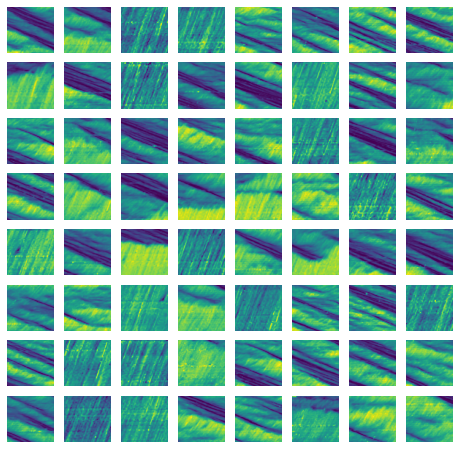

In [2]:
# Create the dataset folder and put "i24speedcontour_64.npy" in the folder

data = np.load('dataset/i24speedcontour_64.npy')

print(f'Shape of the data = {data.shape}\n')
# Shape of the data = (10000, 4, 64, 64)

data_min = data.min()
data_max = data.max()

print(f'Max speed in the data = {data_max:.2f} ft/sec = {data_max*0.681818:.2f} mile/h = {data_max*1.09728:.2f} km/h')
print(f'Min speed in the data = {data_min:.2f} ft/sec = {data_min*0.681818:.2f} mile/h = {data_min*1.09728:.2f} km/h')
# Max speed in the data = 153.28 ft/sec = 104.51 mile/h = 168.19 km/h
# Min speed in the data = 0.01 ft/sec = 0.01 mile/h = 0.01 km/h

data = (data-data.min())/(data.max()-data.min())

# Permute the data for the display
data = torch.tensor(data, dtype=torch.float32)
data = data.permute(0, 1, 3, 2)

# Shows the first lane of the data
fig, ax = plt.subplots(8, 8, figsize=(8, 8))
for i in range(8):
    for j in range(8):
        ax[i, j].imshow(data[np.random.randint(data.shape[0])][0], origin="lower")
        ax[i, j].axis("off")
        
data = data*(data_max-data_min) + data_min

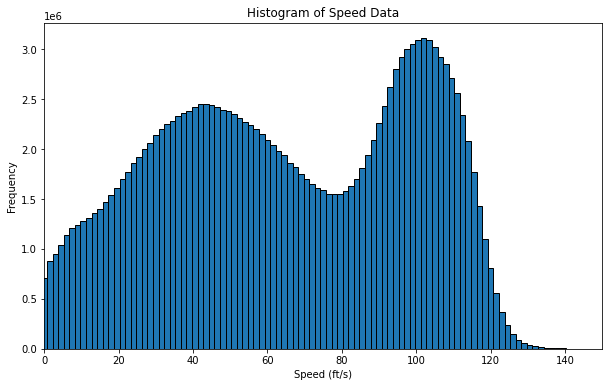

In [3]:
# Trim the dataset after 145 ft/s
data[data > 145] = 145

# Draw a speed histogram
num_bins = 100
range_min = 0
range_max = 150
bin_edges = np.linspace(range_min, range_max, num_bins + 1)

hist_counts = np.zeros(num_bins)
chunk_size = 100 
num_chunks = data.shape[0] // chunk_size

for i in range(num_chunks):
    chunk = data[i * chunk_size: (i + 1) * chunk_size]
    hist_counts += np.histogram(chunk, bins=bin_edges)[0]

# Process any remaining data that wasn't included in the chunks
if data.shape[0] % chunk_size != 0:
    remaining_data = data[num_chunks * chunk_size:]
    hist_counts += np.histogram(remaining_data, bins=bin_edges)[0]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], hist_counts, width=bin_edges[1] - bin_edges[0], edgecolor='black')
plt.xlim(range_min, range_max)
plt.xlabel('Speed (ft/s)')
plt.ylabel('Frequency')
plt.title('Histogram of Speed Data')
plt.show()

- In the other ipynb file, we will proceed two operations after loading the data
- 1. data = data.permute(0, 1, 3, 2)
- 2. data[data > 145] = 145